# Semiconductor manufacturing process dataset

## Project Description
Source: https://www.kaggle.com/saurabhbagchi/fmst-semiconductor-manufacturing-project

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning, and reduce per-unit production costs. These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

Dataset: SemiconductorManufacturingProcessDataset.csv (on Canvas)

Later, we will learn how to apply PCA (Principal Component Analyses) for feature selection; then we will apply ANN to predict the Pass/Fail. in this exercise our objective is to repeat the same steps we did above for Supplier Data: Cleaning & Scaling Data, Encode Categorical Data, Split the Data to Training & Test Sets. 

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
dataset = pd.read_csv('SemiconductorManufacturingProcessDataset.csv')

## Showing the Dataset in a Table

In [3]:
pd.DataFrame(dataset)
#dataset

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,...,Sensor 429,Sensor 430,Sensor 431,Sensor 432,Sensor 433,Sensor 434,Sensor 435,Sensor 436,Sensor 437,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,Pass
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,Pass
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,Fail
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,Pass
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,10/16/2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,Pass
1563,10/16/2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,Pass
1564,10/17/2008 5:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,Pass
1565,10/17/2008 6:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,Pass


## A Quick Review of the Data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 439 entries, Time to Pass/Fail
dtypes: float64(437), object(2)
memory usage: 5.2+ MB


## Seperate The Input and Output
Here, we put the independent variables in X and the dependent variable in y. 

In [5]:
X = dataset.iloc[:, 1:438].values
y = dataset.iloc[:, -1].values

## Showing the Input Data in a Table format

In [6]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,NaN,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


## A Quick Check of the Output Data

In [7]:
pd.DataFrame(y)

,0
0,Pass
1,Pass
2,Fail
3,Pass
4,Pass
...,...
1562,Pass
1563,Pass
1564,Pass
1565,Pass


## Taking care of missing data

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [9]:
# A quick check
print(X)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]


## Encoding Categorical Data

### Encoding the Independent Variable

In [10]:
# we don't have any categorical data

### Encoding the Dependent Variable

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# a qucik check
print(y)

[1 1 0 ... 1 1 1]


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [15]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [16]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


In [17]:
print(y_train)

[0 1 1 ... 1 1 1]


In [18]:
print(y_test)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [19]:
print(X_train)

[[-0.96046311 -0.73813734 -0.92237938 ... -0.06531583 -0.16868853
  -0.2120265 ]
 [-0.87742151  0.5426257  -0.13250295 ...  0.60499301  0.38972867
   3.17408017]
 [ 0.05645609 -1.51130825  1.47184855 ...  0.04829584  0.04071792
   0.42803032]
 ...
 [-0.55464836 -0.10473817 -1.25868434 ...  1.9342495   2.16968349
   0.21655552]
 [-0.24467179 -0.00336937 -1.42475658 ... -0.64473532 -0.79690788
  -0.64548212]
 [-0.36283589 -0.07880372  0.55448143 ... -0.19028866 -0.02908423
   1.62346601]]


In [20]:
print(X_test)

[[ 0.38726113 -0.80185131  0.15916359 ... -0.66745766 -0.65730358
  -0.56211928]
 [-0.02413509 -0.94137368 -0.96134565 ... -1.08782082 -0.86671003
  -0.69795783]
 [ 0.70418053  0.53813704 -0.68064891 ... -0.06531583  0.00581685
  -0.30543175]
 ...
 [ 0.08504418  0.83962507 -1.23522968 ... -1.12190432 -1.07611647
  -0.7688942 ]
 [ 2.27530028  0.21096393 -0.97685385 ... -0.59929066 -0.55260035
  -0.6417691 ]
 [-0.8523729  -0.23341296 -0.28457524 ... -0.50840133 -0.51769928
  -0.33965675]]


# Classification Models

We will investigate a logistic classification model, a Random Forest model and an SVM model. The script below will train each model and output comprehensive data about the performance. 


Logistic Regression Results:
--------------------------------------------------
Test Set Accuracy: 0.8280

K-fold Cross Validation Scores:
Mean CV Accuracy: 0.8404 (+/- 0.0363)
Individual fold scores: ['0.8167', '0.8247', '0.8486', '0.8680', '0.8440']

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.23      0.16        22
           1       0.94      0.87      0.90       292

    accuracy                           0.83       314
   macro avg       0.53      0.55      0.53       314
weighted avg       0.88      0.83      0.85       314



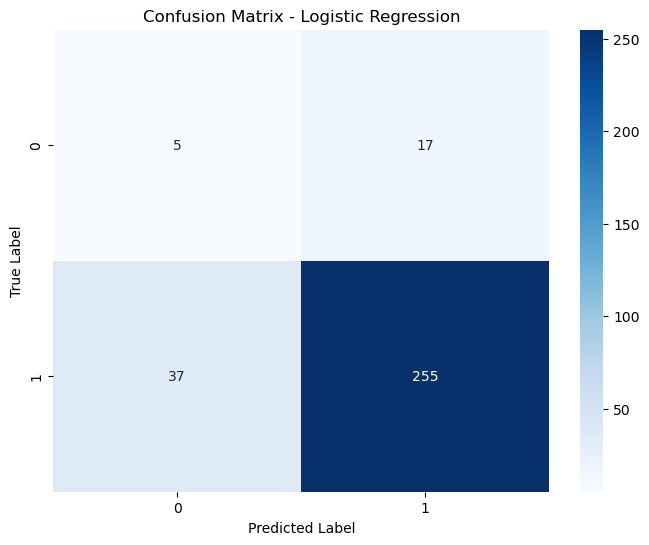


Random Forest Results:
--------------------------------------------------
Test Set Accuracy: 0.9299

K-fold Cross Validation Scores:
Mean CV Accuracy: 0.9345 (+/- 0.0374)
Individual fold scores: ['0.9163', '0.9522', '0.9522', '0.9080', '0.9440']

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.93      1.00      0.96       292

    accuracy                           0.93       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.86      0.93      0.90       314



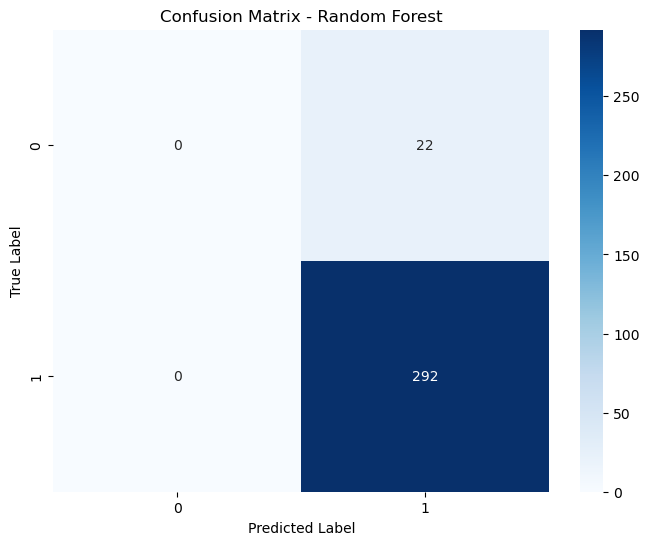


SVM Results:
--------------------------------------------------
Test Set Accuracy: 0.9204

K-fold Cross Validation Scores:
Mean CV Accuracy: 0.9290 (+/- 0.0348)
Individual fold scores: ['0.9084', '0.9442', '0.9482', '0.9080', '0.9360']

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.05      0.07        22
           1       0.93      0.99      0.96       292

    accuracy                           0.92       314
   macro avg       0.57      0.52      0.52       314
weighted avg       0.88      0.92      0.90       314



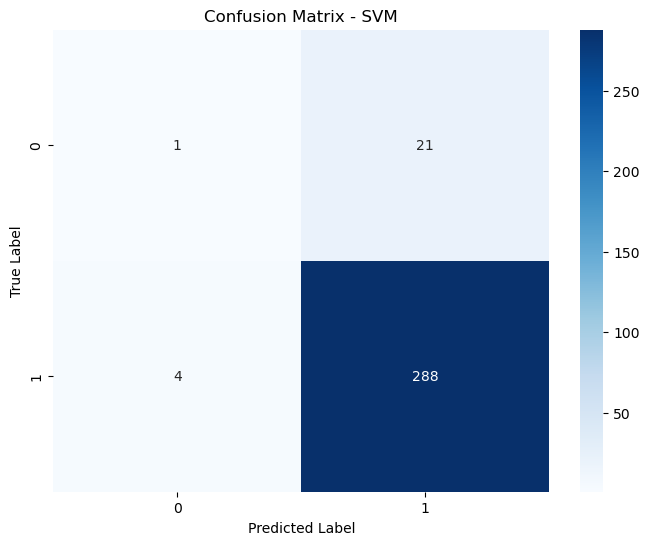

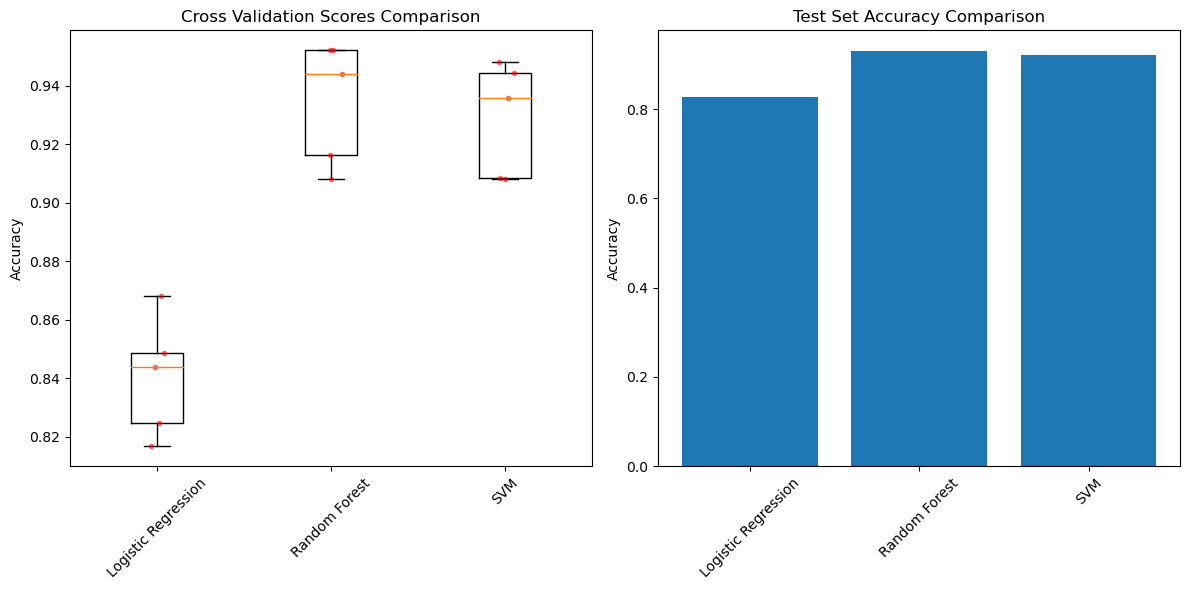


Model Comparison Summary:
--------------------------------------------------------------------------------
              Model  Test Accuracy  CV Mean Accuracy   CV Std
Logistic Regression       0.828025          0.840408 0.018158
      Random Forest       0.929936          0.934543 0.018700
                SVM       0.920382          0.928959 0.017415


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, needs_scaling=False):
    """
    Train and evaluate a single model, including k-fold validation
    """
    # Scale the features if needed (important for SVM)
    if needs_scaling:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Perform k-fold cross validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    
    # Print results
    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print(f"\nK-fold Cross Validation Scores:")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Individual fold scores: {[f'{score:.4f}' for score in cv_scores]}")
    print("\nClassification Report:")
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return {
        'accuracy': accuracy,
        'cv_scores': cv_scores,
        'conf_matrix': conf_matrix,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

def compare_models(models_results):
    """
    Create comparison visualizations for the models
    """
    # Prepare data for box plot
    model_names = list(models_results.keys())
    cv_scores = [results['cv_scores'] for results in models_results.values()]
    test_accuracies = [results['accuracy'] for results in models_results.values()]
    
    # Create box plot
    plt.figure(figsize=(12, 6))
    
    # Plot CV scores
    plt.subplot(1, 2, 1)
    plt.boxplot(cv_scores, labels=model_names)
    plt.title('Cross Validation Scores Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    
    # Add individual points for CV scores
    for i in range(len(model_names)):
        x = np.random.normal(i + 1, 0.04, size=len(cv_scores[i]))
        plt.plot(x, cv_scores[i], 'r.', alpha=0.5)
    
    # Plot test accuracies
    plt.subplot(1, 2, 2)
    plt.bar(model_names, test_accuracies)
    plt.title('Test Set Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Initialize models
log_reg = LogisticRegression(random_state=35, max_iter=1000, class_weight='balanced',
                            solver='lbfgs')
rf_clf = RandomForestClassifier(random_state=35, class_weight='balanced', 
                               n_estimators=100, max_depth=10)
svm_clf = SVC(kernel='rbf',  # RBF kernel for non-linear classification
              C=1.0,         # Regularization parameter
              gamma='scale', # Kernel coefficient
              class_weight='balanced',
              probability=True,
              random_state=35)

# Dictionary to store results
models_results = {}

# Train and evaluate all models
models_results['Logistic Regression'] = train_and_evaluate_model(
    log_reg, X_train, X_test, y_train, y_test, "Logistic Regression"
)

models_results['Random Forest'] = train_and_evaluate_model(
    rf_clf, X_train, X_test, y_train, y_test, "Random Forest"
)

models_results['SVM'] = train_and_evaluate_model(
    svm_clf, X_train, X_test, y_train, y_test, "SVM", needs_scaling=True  # SVM needs scaled features
)

# Compare models
compare_models(models_results)

# Feature importance for Random Forest and coefficients for Logistic Regression
if hasattr(X_train, 'columns'):
    # Random Forest feature importance
    rf_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_clf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Logistic Regression coefficients (absolute values)
    lr_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.abs(log_reg.coef_[0])
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.barplot(data=rf_importance, x='importance', y='feature')
    plt.title('Random Forest Feature Importance')
    
    plt.subplot(1, 2, 2)
    sns.barplot(data=lr_importance, x='importance', y='feature')
    plt.title('Logistic Regression Feature Importance')
    
    plt.tight_layout()
    plt.show()

# Calculate and display model comparison statistics
comparison_stats = pd.DataFrame({
    'Model': models_results.keys(),
    'Test Accuracy': [results['accuracy'] for results in models_results.values()],
    'CV Mean Accuracy': [results['cv_scores'].mean() for results in models_results.values()],
    'CV Std': [results['cv_scores'].std() for results in models_results.values()]
})

print("\nModel Comparison Summary:")
print("-" * 80)
print(comparison_stats.to_string(index=False))

# Conclusion

Based on the comparison table, the Random Forest model outperforms both Logistic Regression and SVM in terms of test accuracy, achieving the highest value of 0.929936. It also has the highest cross-validation (CV) mean accuracy (0.934543) with a slightly higher standard deviation (0.018700), indicating a well-performing and consistent model overall. 

SVM comes close with a test accuracy of 0.920382 and a CV mean accuracy of 0.928959, along with a low standard deviation, making it a reliable choice as well. 

Logistic Regression has the lowest test accuracy (0.828025) and CV mean accuracy (0.840408), suggesting that it might not be the best model for this task compared to Random Forest and SVM.